In [1]:
import pandas as pd
import glob
import os

#### Merging 12 months of sales into  SINGLE FILE


In [2]:

files=[file for file in  os.listdir('D:/pramod/datasets/Pandas-Data-Science-Tasks-master/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/')]

In [3]:
dfs=[]

for file in files:
    data=pd.read_csv('/pramod/datasets/Pandas-Data-Science-Tasks-master/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/'+file)
    dfs.append(data)

merged_df=pd.concat(dfs)

merged_df.head()

merged_df.to_csv('merged_sales.csv', index=False)

#### Read the updated datafraeme

In [4]:
all_data=pd.read_csv('merged_sales.csv')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


### Cleaning up the the data

In [5]:
all_data.drop_duplicates(inplace=True)

In [6]:
all_data.dropna(inplace=True)
all_data.reset_index(drop=True,inplace=True)
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


### Augment data with additional columns

# Task2:Add Month Column

In [7]:

all_data['Month']=all_data['Order Date'].str[0:2]
all_data=all_data[all_data['Order Date'].str[0:2]!='Or']
all_data['Month']=all_data['Month'].astype('int32')
all_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
2,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


#### Task 3: Add sales column

In [8]:
# Converting quantity ordered and price each into int
all_data['Quantity Ordered']=pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each']=pd.to_numeric(all_data['Price Each'])

all_data['Sales']=all_data['Quantity Ordered']*all_data['Price Each']

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


##### Q1. What was the best month for sales and how much money was earned in that month

In [9]:
max_sales=all_data.groupby('Month')['Sales'].agg(['sum'])
max_sales.sort_values(by=['sum'])

,sum
Month,
1,1821413.16
9,2094465.69
2,2200078.08
8,2241083.37
6,2576280.15
7,2646461.32
3,2804973.35
5,3150616.23
11,3197875.05


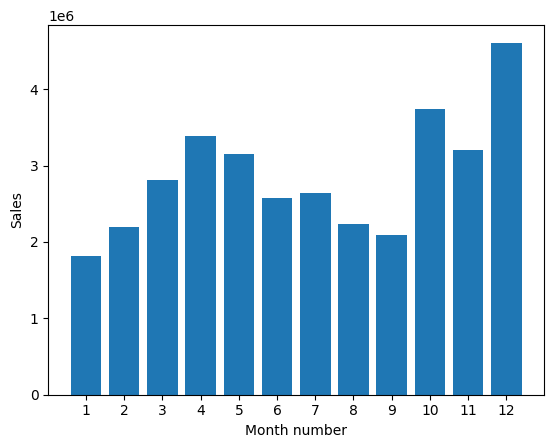

In [10]:
import matplotlib.pyplot as plt

months=range(1,13)
sales=max_sales['sum']
plt.bar(months, sales )
plt.xticks(months)
plt.xlabel('Month number')
plt.ylabel('Sales')
plt.show()


##### What cities have highest number of sales


In [11]:
def get_city(address):
    return address.split(',')[1]
    
def get_state(address):
    return address.split(',')[2].split(' ')[1]
   

all_data['City']=all_data['Purchase Address'].apply(lambda x:get_city(x)+' '+get_state(x))
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA


In [12]:
max_sale_city=all_data.groupby('City')['Sales'].agg(['sum'])
max_sale_city

,sum
City,
Atlanta GA,2794199.07
Austin TX,1818044.33
Boston MA,3658627.65
Dallas TX,2765373.96
Los Angeles CA,5448304.28
New York City NY,4661867.14
Portland ME,449321.38
Portland OR,1870010.56
San Francisco CA,8254743.55


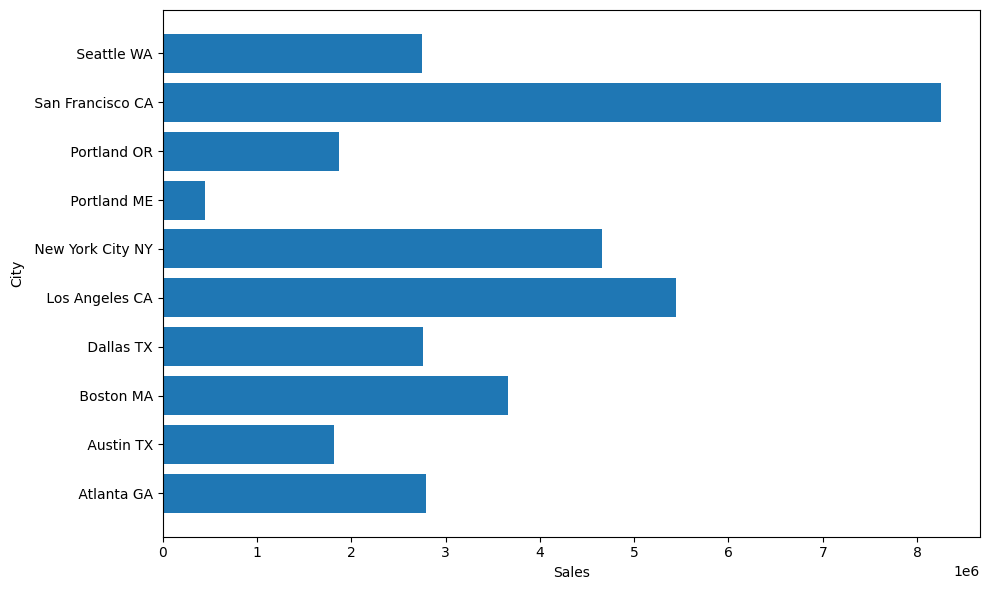

In [13]:
import matplotlib.pyplot as plt

cities=[city for city ,df in all_data.groupby('City')]

sales = max_sale_city['sum']

plt.figure(figsize=(10, 6))  # Adjust the figure size as desired
plt.barh(cities, sales)
plt.xlabel('Sales')
plt.ylabel('City')
plt.tight_layout()  # Adjust the spacing between the plot and the edges of the figure

plt.show()



##### Q3: What time is best for advertisements to maximize the likelihood of customers buying product

In [14]:
all_data['Order Date']=pd.to_datetime(all_data['Order Date'])

C:\Users\pramo\AppData\Local\Temp\ipykernel_21780\2539822065.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  all_data['Order Date']=pd.to_datetime(all_data['Order Date'])


In [15]:
all_data['Hour']=all_data['Order Date'].dt.hour
all_data['Minute']=all_data['Order Date'].dt.minute
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX,8,46
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA,22,30
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,14,38
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,14,38
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,9,27


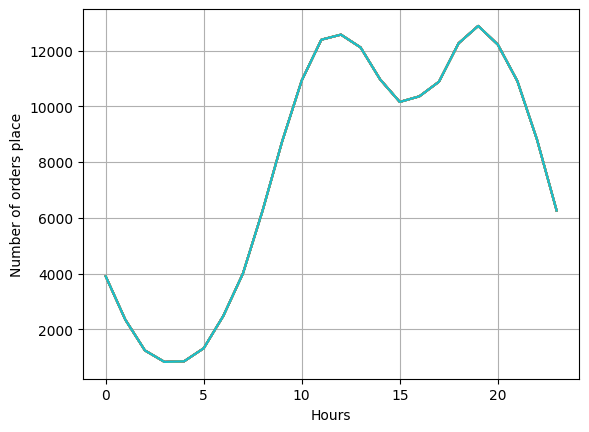

In [16]:
hours=[hour for hour ,df in all_data.groupby('Hour')]

plt.plot(hours, all_data.groupby(['Hour']).count())
plt.grid()
plt.xlabel('Hours')
plt.ylabel('Number of orders place')
plt.show()

##### Q4: What products are the most often sold together

In [17]:
df=all_data[all_data['Order ID'].duplicated(keep=False)]

df['Grouped']=df.groupby('Order ID')['Product'].transform(lambda x:','.join(x))
df=df[['Order ID', 'Grouped']].drop_duplicates()
df.head()

C:\Users\pramo\AppData\Local\Temp\ipykernel_21780\2918269978.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped']=df.groupby('Order ID')['Product'].transform(lambda x:','.join(x))


,Order ID,Grouped
2,176560,"Google Phone,Wired Headphones"
17,176574,"Google Phone,USB-C Charging Cable"
30,176586,"AAA Batteries (4-pack),Google Phone"
117,176672,"Lightning Charging Cable,USB-C Charging Cable"
127,176681,"Apple Airpods Headphones,ThinkPad Laptop"


In [38]:
from itertools import combinations
from collections import Counter

count=Counter()

for row in df['Grouped']:
    row_list=row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key, value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1002
('Google Phone', 'USB-C Charging Cable') 985
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 413
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 159
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


#### Q5: What products was sold the most? Why do you think it sold the most?

In [39]:
most_sold=all_data.groupby('Product')['Quantity Ordered'].agg(['count'])

In [40]:
most_sold.sort_values(by=['count'])
most_sold

,count
Product,
20in Monitor,4098
27in 4K Gaming Monitor,6225
27in FHD Monitor,7498
34in Ultrawide Monitor,6174
AA Batteries (4-pack),20558
AAA Batteries (4-pack),20612
Apple Airpods Headphones,15525
Bose SoundSport Headphones,13298
Flatscreen TV,4794


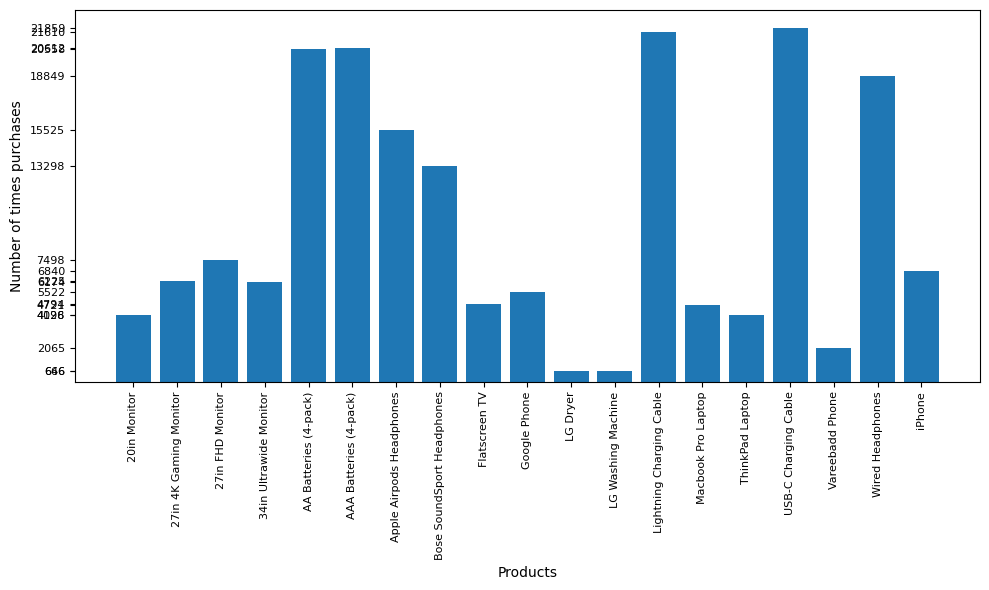

In [58]:
products=[product for product ,df in all_data.groupby('Product')]

quantity_ordered=most_sold['count']
plt.figure(figsize=(10, 6))
plt.bar(products, quantity_ordered )
plt.xticks(products, rotation='vertical', size=8)
plt.yticks(count, size=8)
plt.xlabel('Products')
plt.ylabel('Number of times purchases')
plt.tight_layout()
plt.show()


C:\Users\pramo\AppData\Local\Temp\ipykernel_21780\2696173145.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(products, rotation='vertical', size=8)
C:\Users\pramo\AppData\Local\Temp\ipykernel_21780\2696173145.py:17: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


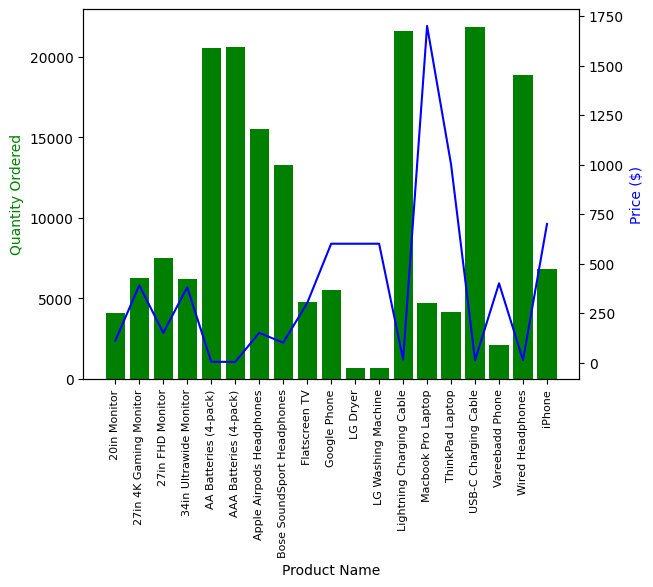

In [65]:
prices=all_data.groupby('Product')['Price Each'].agg(['mean'])
price=prices['mean']


fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered, color='g')
ax2.plot(products, price, 'b-')

ax1.set_xlabel('Product Name')
ax1.set_xticklabels(products, rotation='vertical', size=8)
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')


fig.show()
